In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam

seed = 1234
np.random.seed(seed)
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('drive')

dataraw = pd.read_csv('/content/drive/MyDrive/COE 005/Q2/AYAAF.csv',index_col='Date', parse_dates=['Date'])
dataraw

Mounted at drive


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-12,0.62,0.62,0.62,0.62,0.610634,0
2020-10-13,0.62,0.62,0.62,0.62,0.610634,0
2020-10-14,0.62,0.62,0.62,0.62,0.610634,0
2020-10-15,0.62,0.62,0.62,0.62,0.610634,800
2020-10-16,0.62,0.62,0.62,0.62,0.610634,0
...,...,...,...,...,...,...
2022-10-03,0.48,0.48,0.48,0.48,0.480000,0
2022-10-04,0.48,0.48,0.48,0.48,0.480000,0
2022-10-05,0.48,0.48,0.48,0.48,0.480000,0


In [3]:
dataraw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2020-10-12 to 2022-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


 Count row of data:  502


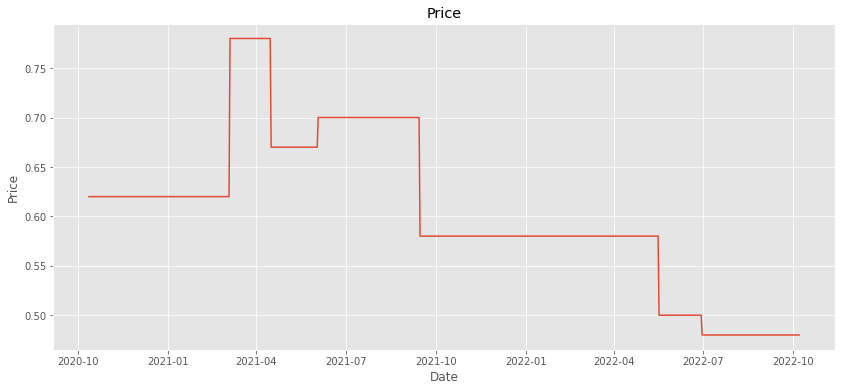

In [4]:
dataset = pd.DataFrame(dataraw['Close'])
print(' Count row of data: ',len(dataset))

fig = plt.figure(figsize=(14, 6))
plt.plot(dataset)
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Price')
plt.show()

In [5]:
dataset_norm = dataset.copy()
dataset[['Close']]
scaler = MinMaxScaler()
dataset_norm['Close'] = scaler.fit_transform(dataset[['Close']])
dataset_norm

,Close
Date,
2020-10-12,0.466667
2020-10-13,0.466667
2020-10-14,0.466667
2020-10-15,0.466667
2020-10-16,0.466667
...,...
2022-10-03,0.000000
2022-10-04,0.000000
2022-10-05,0.000000


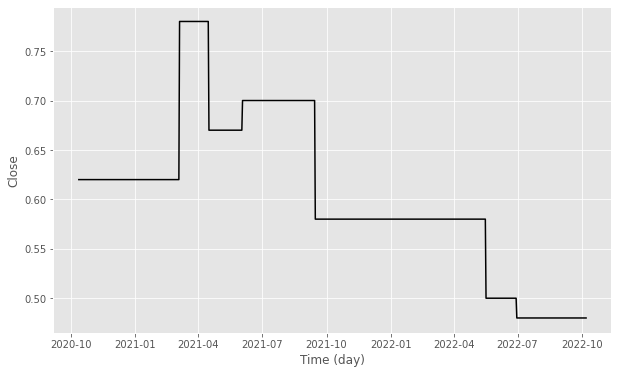

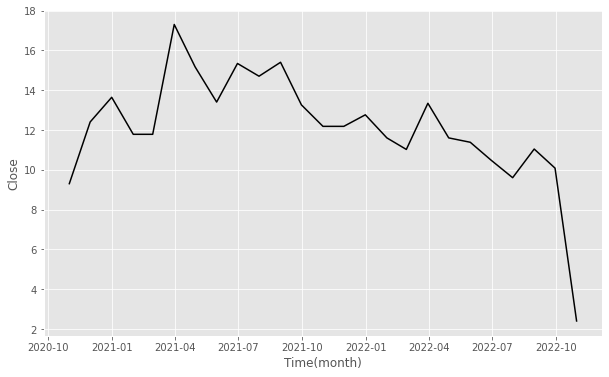

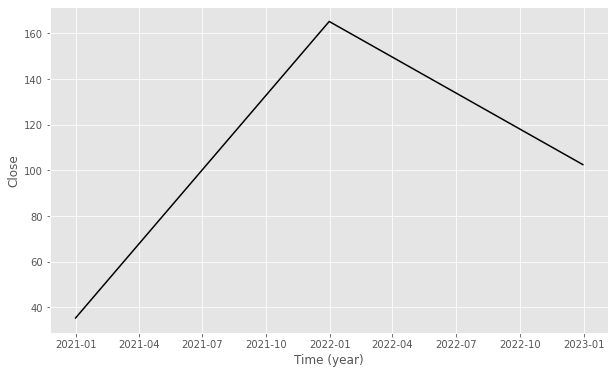

In [6]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Close', {'fontsize': 12})

dataset = dataraw.copy()
timeseries(dataraw.index, dataset['Close'], 'Time (day)')
dataset['month'] = dataset.index.month
dataset_by_month = dataset.resample('M').sum()
timeseries(dataset_by_month.index, dataset_by_month['Close'], 
           'Time(month)')

dataset['year'] = dataset.index.year
dataset_by_year = dataset.resample('Y').sum()
timeseries(dataset_by_year.index, dataset_by_year['Close'], 
           'Time (year)')

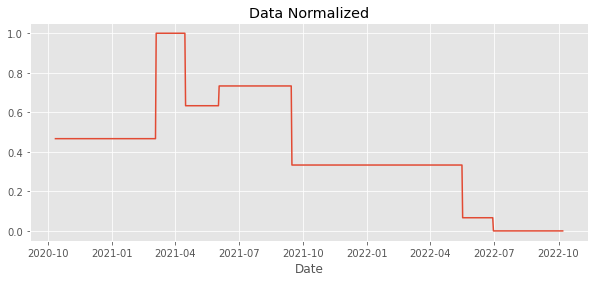

In [7]:
fig = plt.figure(figsize=(10, 4))
plt.plot(dataset_norm)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Normalized')
plt.show()

In [8]:
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.7)
totaldataval = int(len(totaldata)*0.1)
totaldatatest = int(len(totaldata)*0.2)

training_set = dataset_norm[0:totaldatatrain]
val_set=dataset_norm[totaldatatrain:totaldatatrain+totaldataval]
test_set = dataset_norm[totaldatatrain+totaldataval:]

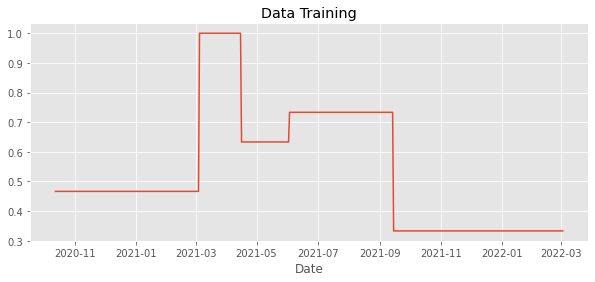

In [9]:
fig = plt.figure(figsize=(10, 4))
plt.plot(training_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Training')
plt.show()

,Close
Date,
2022-03-04,0.333333
2022-03-07,0.333333
2022-03-08,0.333333
2022-03-09,0.333333
2022-03-10,0.333333
2022-03-11,0.333333
2022-03-14,0.333333
2022-03-15,0.333333
2022-03-16,0.333333


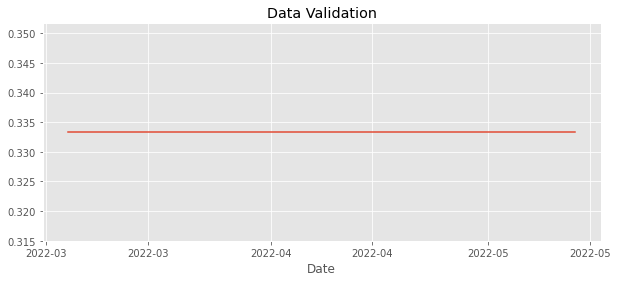

In [10]:
fig = plt.figure(figsize=(10, 4))
plt.plot(val_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Validation')
val_set

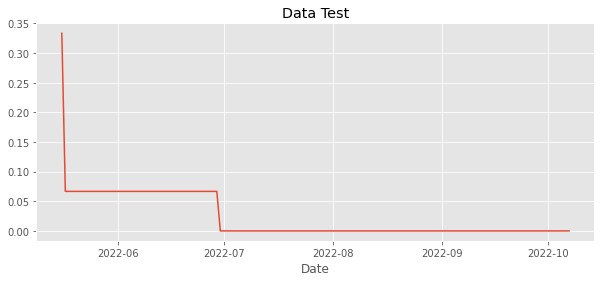

,Close
Date,
2022-05-16,0.333333
2022-05-17,0.066667
2022-05-18,0.066667
2022-05-19,0.066667
2022-05-20,0.066667
...,...
2022-10-03,0.000000
2022-10-04,0.000000
2022-10-05,0.000000


In [11]:
fig = plt.figure(figsize=(10, 4))
plt.plot(test_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Test')
plt.show()
test_set

In [12]:

lag = 2

def create_sliding_windows(data,len_data,lag):
    x=[]
    y=[]
    for i in range(lag,len_data):
        x.append(data[i-lag:i,0])
        y.append(data[i,0]) 
    return np.array(x),np.array(y)

array_training_set = np.array(training_set)
array_val_set = np.array(val_set)
array_test_set = np.array(test_set)


x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_val,y_val = create_sliding_windows(array_val_set,len(array_val_set),lag)
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set),lag)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [13]:
learning_rate = 0.0001
hidden_unit = 64
batch_size=256
epoch = 100


regressorGRU = Sequential()

regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1],1), activation = 'tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, activation = 'tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=hidden_unit, return_sequences=False, activation = 'tanh'))
regressorGRU.add(Dropout(0.2))


regressorGRU.add(Dense(units=1))

regressorGRU.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),loss='mean_squared_error')

pred = regressorGRU.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=batch_size, epochs=epoch)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 6s 901ms/step - loss: 0.3379 - val_loss: 0.1096
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 0.3290 - val_loss: 0.1056
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 0.3211 - val_loss: 0.1017
Epoch 4/100
2/2 [==============================] - 0s 26ms/step - loss: 0.3116 - val_loss: 0.0979
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 0.3033 - val_loss: 0.0941
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2959 - val_loss: 0.0904
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2877 - val_loss: 0.0867
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2796 - val_loss: 0.0831
Epoch 9/100
2/2 [==============================] - 0s 38ms/step - loss: 0.2723 - val_loss: 0.0795
Epoch 10/100
2/2 [==============================] - 0s 30ms/step - loss: 0.2637 - val_loss: 0.0760
Epoch 11/100
2/2 [============

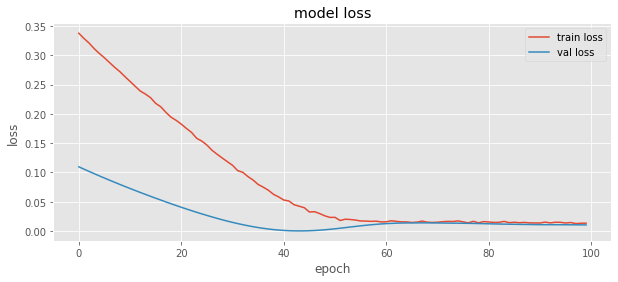

In [14]:
fig = plt.figure(figsize=(10, 4))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [15]:
learningrate_parameter = learning_rate
train_loss=pred.history['loss'][-1]
validation_loss=pred.history['val_loss'][-1]
learningrate_parameter=pd.DataFrame(data=[[learningrate_parameter, train_loss, validation_loss]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter.set_index('Learning Rate')

,Training Loss,Validation Loss
Learning Rate,,
0.0001,0.013239,0.010258


In [16]:

y_pred_test = regressorGRU.predict(x_test)

y_pred_invert_norm = scaler.inverse_transform(y_pred_test)

4/4 [==============================] - 1s 3ms/step


In [17]:
datacompare = pd.DataFrame()
datatest=np.array(dataset['Close'][totaldatatrain+totaldataval+lag:])
datapred= y_pred_invert_norm

datacompare['Data Test'] = datatest
datacompare['Prediction Results'] = datapred
datacompare

,Data Test,Prediction Results
0,0.50,0.596118
1,0.50,0.567616
2,0.50,0.567616
3,0.50,0.567616
4,0.50,0.567616
...,...,...
94,0.48,0.557149
95,0.48,0.557149
96,0.48,0.557149
97,0.48,0.557149


In [18]:
def rmse(datatest, datapred):
    return np.round(np.sqrt(np.mean((datapred - datatest) ** 2)), 4)
print('Result Root Mean Square Error Prediction Model :',rmse(datatest, datapred))

def mape(datatest, datapred): 
    return np.round(np.mean(np.abs((datatest - datapred) / datatest) * 100), 4)
    
print('Result Mean Absolute Percentage Error Prediction Model : ', mape(datatest, datapred), '%')

Result Root Mean Square Error Prediction Model : 0.0756
Result Mean Absolute Percentage Error Prediction Model :  15.4395 %


In [19]:
#datapred.to_csv('/content/drive/MyDrive/COE 005/Q2/Danao_Ayala_forecast.csv', index=False)  
datapred[0:7,:].tofile('/content/drive/MyDrive/COE 005/Q2/Danao_Ayala_forecast.csv', sep = '\n')